In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

#  Reading in the data 

In [2]:
churn_data=pd.read_csv("churn.csv")
churn_data_viz=churn_data

# Data Preprocessing

In [3]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
labelEncoder_for_catagories=LabelEncoder() # For Lable Encoding


In [4]:
churn_data["gender"]=labelEncoder_for_catagories.fit_transform(churn_data["gender"])
churn_data["Partner"]=labelEncoder_for_catagories.fit_transform(churn_data["Partner"])
churn_data["Dependents"]=labelEncoder_for_catagories.fit_transform(churn_data["Dependents"])
churn_data["PhoneService"]=labelEncoder_for_catagories.fit_transform(churn_data["PhoneService"])
churn_data["MultipleLines"]=labelEncoder_for_catagories.fit_transform(churn_data["MultipleLines"])
churn_data["InternetService"]=labelEncoder_for_catagories.fit_transform(churn_data["InternetService"])
churn_data["OnlineSecurity"]=labelEncoder_for_catagories.fit_transform(churn_data["OnlineSecurity"])
churn_data["OnlineBackup"]=labelEncoder_for_catagories.fit_transform(churn_data["OnlineBackup"])
churn_data["DeviceProtection"]=labelEncoder_for_catagories.fit_transform(churn_data["DeviceProtection"])
churn_data["TechSupport"]=labelEncoder_for_catagories.fit_transform(churn_data["TechSupport"])
churn_data["PaymentMethod"]=labelEncoder_for_catagories.fit_transform(churn_data["PaymentMethod"])
churn_data["StreamingTV"]=labelEncoder_for_catagories.fit_transform(churn_data["StreamingTV"])
churn_data["StreamingMovies"]=labelEncoder_for_catagories.fit_transform(churn_data["StreamingMovies"])
churn_data["Contract"]=labelEncoder_for_catagories.fit_transform(churn_data["Contract"])
churn_data["PaperlessBilling"]=labelEncoder_for_catagories.fit_transform(churn_data["PaperlessBilling"])
churn_data["TotalCharges"]=labelEncoder_for_catagories.fit_transform(churn_data["TotalCharges"])
churn_data["Churn"]=labelEncoder_for_catagories.fit_transform(churn_data["Churn"])

In [5]:
churn_data.fillna(method='ffill', inplace=True)
churn_data.fillna(method='bfill', inplace=True)

#  Data Analysis - Identifying Patterns

F:\nff\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


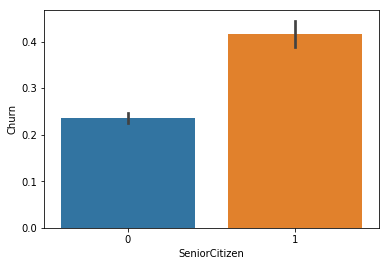

In [6]:
sns.barplot(x='SeniorCitizen',y='Churn',data=churn_data)

The above bar plot shows that the Senior citizens are more likely to churn than a non-Senior Citizen

F:\nff\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


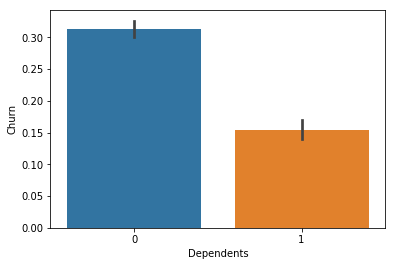

In [7]:
sns.barplot(x='Dependents',y='Churn',data=churn_data_viz)

The above graph shows that a person who has no dependents is more likely to Churn than the person who has dependents. This makes sense since a person with kids is more likely to have a TV subscription than a person who does not have any kids at all

F:\nff\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
F:\nff\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


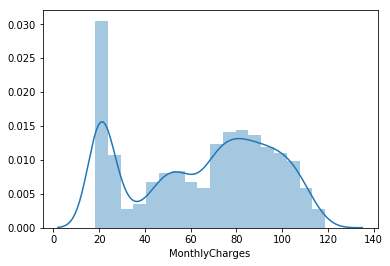

In [8]:
sns.distplot(churn_data.MonthlyCharges)

The above graph shows the distibution of Monthly charges based on the type of the subscription

F:\nff\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


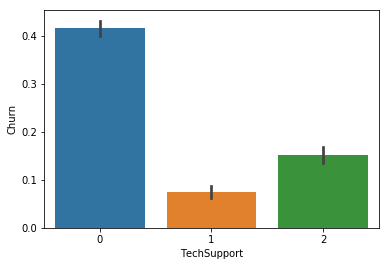

In [9]:
sns.barplot(x='TechSupport',y='Churn',data=churn_data_viz)

This graph is particulary interesting. This shows that the people who do not have tech support are more likely to churn shown by  category 0 than those who have the tech support as shown by category 1. Category-2 are those who do not have internet connection

F:\nff\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


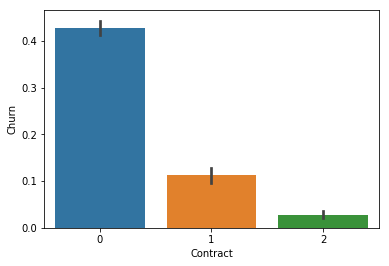

In [10]:
sns.barplot(x='Contract',y='Churn',data=churn_data_viz)

Above is another interesting insight from the data. It shows that customers who have a month-to-month subscription ( group-0) is more likely to cancel their subscription than those who have a contract of one year and those who have a contract of 2 years are the least likely customers to cancel a subscription

#  Predictive Modelling - Using Decision Trees

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X = churn_data.loc[:,["gender","SeniorCitizen","Partner",'Dependents','tenure','PhoneService','MultipleLines','InternetService',
                'OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract'
                ,'PaperlessBilling','PaymentMethod','MonthlyCharges','TotalCharges']].values
y=churn_data.Churn.values
X

array([[0.0000e+00, 0.0000e+00, 1.0000e+00, ..., 2.0000e+00, 2.9850e+01,
        2.5050e+03],
       [1.0000e+00, 0.0000e+00, 0.0000e+00, ..., 3.0000e+00, 5.6950e+01,
        1.4660e+03],
       [1.0000e+00, 0.0000e+00, 0.0000e+00, ..., 3.0000e+00, 5.3850e+01,
        1.5700e+02],
       ...,
       [0.0000e+00, 0.0000e+00, 1.0000e+00, ..., 2.0000e+00, 2.9600e+01,
        2.9940e+03],
       [1.0000e+00, 1.0000e+00, 1.0000e+00, ..., 3.0000e+00, 7.4400e+01,
        2.6600e+03],
       [1.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 1.0565e+02,
        5.4070e+03]])

In [13]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)

In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.grid_search import GridSearchCV

F:\nff\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
F:\nff\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [15]:
clf=DecisionTreeClassifier()

In [16]:
parameter_grid = {'max_depth': [1, 2, 3, 4, 5,6,5,9,15,20],
                  'max_features': [1, 2, 3, 4,5,6,7,8],
                 'random_state':[0,15,20,35,50,80,100,150,180,200],
                 'criterion':['gini','entropy'],
                 }

grid_search = GridSearchCV(clf, param_grid = parameter_grid,
                          cv =10)

grid_search.fit(X, y)

print ("Best Score: {}".format(grid_search.best_score_))
print ("Best params: {}".format(grid_search.best_params_))

Best Score: 0.7932699133891807
Best params: {'criterion': 'gini', 'max_depth': 6, 'max_features': 7, 'random_state': 150}


In [17]:
clf=DecisionTreeClassifier(criterion= 'gini', max_depth= 6, max_features= 7, random_state= 150)

In [18]:
clf.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
            max_features=7, max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=150, splitter='best')

In [19]:
y_pred=clf.predict(X_test)

In [20]:
target_names = ['Not Churn', 'Churn']
rep=classification_report(y_test,y_pred,target_names=target_names)

In [21]:
print(rep)

             precision    recall  f1-score   support

  Not Churn       0.85      0.86      0.86      1697
      Churn       0.62      0.60      0.61       628

avg / total       0.79      0.79      0.79      2325



In [31]:
from sklearn import tree
tree.export_graphviz(clf, out_file="C4W1.dot")

In [34]:
from graphviz import Source
file = open('C4W1.docx', 'r')#READING DOT FILE
text=file.read()
Source(text)

FileNotFoundError: [Errno 2] No such file or directory: 'C4W1.docx'